In [1]:
!pip install pandas numpy matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set the random seed for reproducibility
np.random.seed(42)

In [4]:
# Generate sample data
num_records = 1000

In [5]:
# Create a fictional dataset
data = {
    'Order_ID': [f'ORD{str(i).zfill(5)}' for i in range(1, num_records + 1)],
    'Product_Name': np.random.choice(['Coffee', 'Tea', 'Mug', 'Cake', 'Cookies'], num_records),
    'Category': np.random.choice(['Beverages', 'Merchandise'], num_records),
    'Quantity_Sold': np.random.randint(1, 20, num_records),
    'Sale_Price': np.random.uniform(5, 50, num_records).round(2),
    'Order_Date': pd.date_range(start='2022-01-01', periods=num_records, freq='D'),
    'Customer_ID': [f'CUST{str(i).zfill(3)}' for i in np.random.randint(1, 301, num_records)],
    'Customer_Age': np.random.randint(18, 65, num_records),
    'Customer_Location': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], num_records)
}


In [6]:
# Create a DataFrame
df = pd.DataFrame(data)

In [7]:
# Display the first few rows of the dataset
print("Sample Data:")
print(df.head())

Sample Data:
   Order_ID Product_Name     Category  Quantity_Sold  Sale_Price Order_Date  \
0  ORD00001         Cake  Merchandise             12        9.98 2022-01-01   
1  ORD00002      Cookies  Merchandise             17       39.18 2022-01-02   
2  ORD00003          Mug  Merchandise              8       49.46 2022-01-03   
3  ORD00004      Cookies  Merchandise             11       45.56 2022-01-04   
4  ORD00005      Cookies  Merchandise              3       34.33 2022-01-05   

  Customer_ID  Customer_Age Customer_Location  
0     CUST107            64           Houston  
1     CUST295            53          New York  
2     CUST284            26           Phoenix  
3     CUST182            56       Los Angeles  
4     CUST037            36       Los Angeles  


In [8]:
# Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Order_ID             0
Product_Name         0
Category             0
Quantity_Sold        0
Sale_Price           0
Order_Date           0
Customer_ID          0
Customer_Age         0
Customer_Location    0
dtype: int64


In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")


Number of duplicate records: 0


In [10]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [11]:
# Exploratory Data Analysis (EDA)
# 1. Total Sales Calculation
df['Total_Sales'] = df['Quantity_Sold'] * df['Sale_Price']

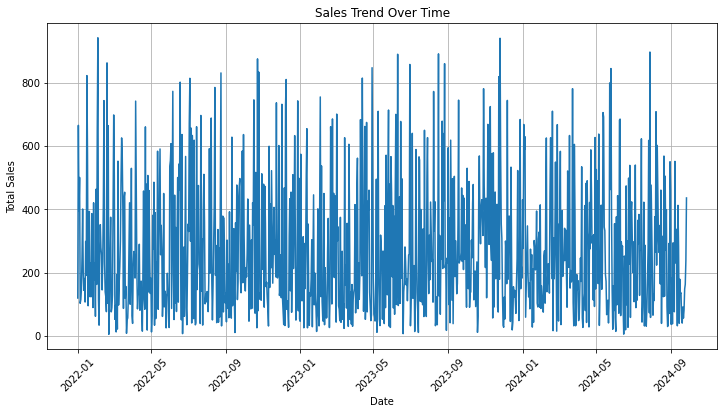

In [12]:
# 2. Sales Trend Over Time
sales_trend = df.groupby('Order_Date')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Order_Date', y='Total_Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

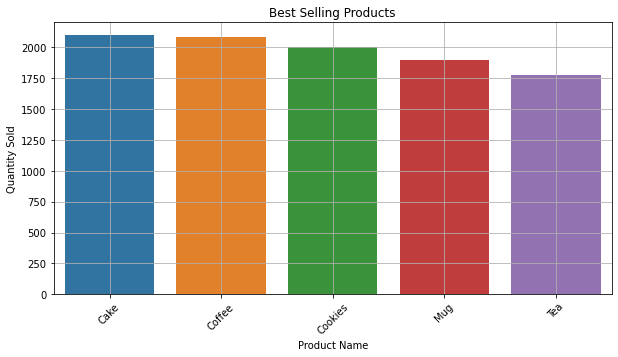

In [13]:
# 3. Best Selling Products
best_selling = df.groupby('Product_Name')['Quantity_Sold'].sum().reset_index().sort_values(by='Quantity_Sold', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=best_selling, x='Product_Name', y='Quantity_Sold')
plt.title('Best Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()

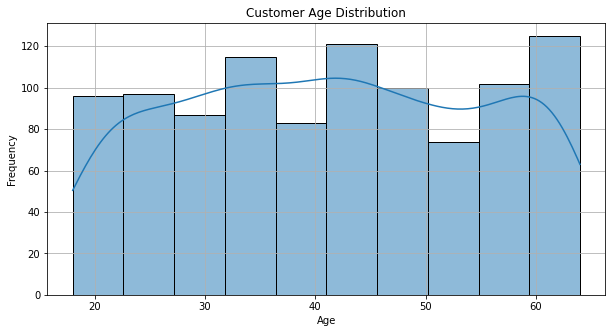

In [14]:
# 4. Customer Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Customer_Age'], bins=10, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

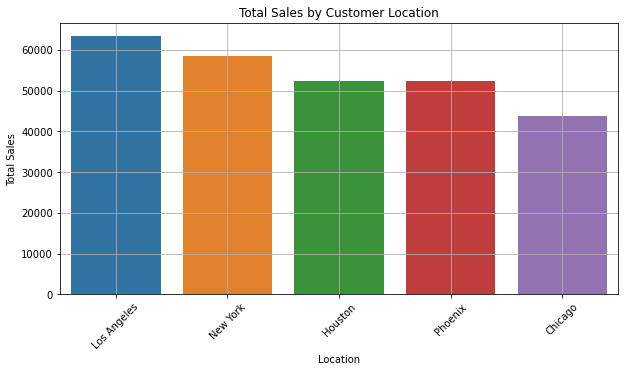

In [15]:
# 5. Customer Location Analysis
location_sales = df.groupby('Customer_Location')['Total_Sales'].sum().reset_index().sort_values(by='Total_Sales', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=location_sales, x='Customer_Location', y='Total_Sales')
plt.title('Total Sales by Customer Location')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [16]:
# Save the cleaned dataset to a CSV file
df.to_csv('ecommerce_sales_data.csv', index=False)
print("\nCleaned dataset saved as 'ecommerce_sales_data.csv'")



Cleaned dataset saved as 'ecommerce_sales_data.csv'
